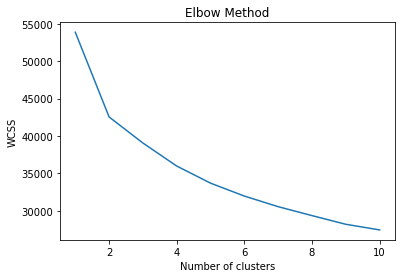

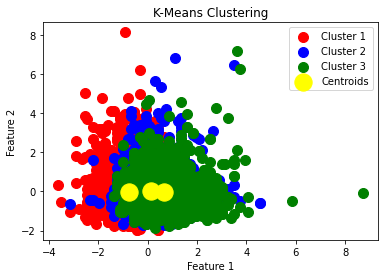

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('whitewine_quality.csv')
X = df.iloc[:, :-1].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_std)

# Visualize the clusters
plt.scatter(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_std[y_kmeans == 2, 0], X_std[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


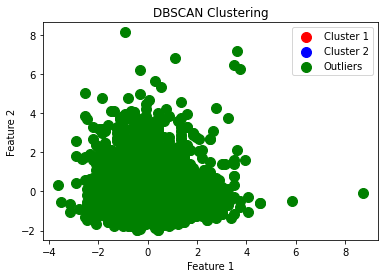

In [3]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_dbscan = dbscan.fit_predict(X_std)

# Visualize the clusters
plt.scatter(X_std[y_dbscan == 0, 0], X_std[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_std[y_dbscan == 1, 0], X_std[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_std[y_dbscan == -1, 0], X_std[y_dbscan == -1, 1], s = 100, c = 'green', label = 'Outliers')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()